## Machine Learning A-Z™

© Kirill Eremenko, Hadelin de Ponteves, SuperDataScience Team |
[Super Data Science](http://www.superdatascience.com)

Part 2: Classification | Section 18: Naive Bayes Classifier
Apr  12, 2019
@author: yinka_ola

---
**Data Scenario**

- Client  is launching a brand new SUV
- We are running an offer on the social media Ad campaign
- What is the probability that they will take up the offer?
- Predict if user will take up the offer or not

- Find correlation between age, salary and decision to purchase
---

In [1]:
## Bayes Theorem:
## how do determine the probability of obtaining a result given a condition?
## P(A|B) = [P(B|A)*P(A)]/P(B)


## Naive Bayes Classifier:
## classifier: walk vs drive
## if we add a new data to the data, how to we classify?
## apply Bayes Theorem 2X
## features of observation: salary, age (can be more features)

## P(walk|x) = [P(x|walk)*P(walks)]/P(x) #probability of walk given features x
## P(drive|x) = [P(x|drive)*P(drive)]/P(x) #probability of drive given features x

## P(walks) - prior probability
## P(x) - marginal likelyhood
## P(x|walks) - likelyhood
## P(walk|x) - Posterior Probability

## Naive Bayes: Probabilistic classifier
## step 1: compute probabilities to be compared
## step 2: compare probability
## step 3: assign to class with highest probability

## Calculate all 4 items:
## P(walks) = No of walk/Total obs
## P(x) = No of similar obs/Tot obs #prob of new point being added 
## P(x|walks) =  among walks/ Total walk #prob of radomnly selected point given that they walk
## P(walk|x) = put it all together

## Step 1: P(walk|x) = 0.75  // P(walk|x) = 0.25
## Step 2: P(walk|x) = 0.75   >  P(walk|x) = 0.25
## step 3: new observation = walks!
## note: usually with 2 classes, it adds up to 1

## Naive Bayes - Other
## Why naive? 
## bayes theorem = independent assumption = ususally not correct = naive assumption
## fundamental Bayes theorem assumption = features should be independent
## realistically not always independent  
## P(x) - the likelyhood that the new addition will exhibit similar features 
## as data point in that area 
## how can we drop P(x)? = only when comparing not when calculating 

In [15]:
# Importing the libraries
import pandas as pd
import numpy as np
import os
#plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,10
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

#explore dataset
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#let's create matrix of features
x = dataset.iloc[:, [2, 3]].values
print(x)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [5]:
#create the dependent variable vector (y-value)
#note 1= will buy, 0= will noy buy
y = dataset.iloc[:, 4].values
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [7]:
#splitting the dataset into the Training set and Test set
#random is set to 0 so that  we get same answer as the instructor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train) #fit to training set

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [12]:
# Evaluate the performance of Logistic regression model via confision matrix
# Making the Confusion Matrix
# note: class start will uppercase and object (function) with lower case

# [[ true negatives (TN)  false positives (FP)]
# [ false negatives(FN)  true positives (TP) ]]


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


In [13]:
# we have 10 (out of 100) incorrect observation prediction.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


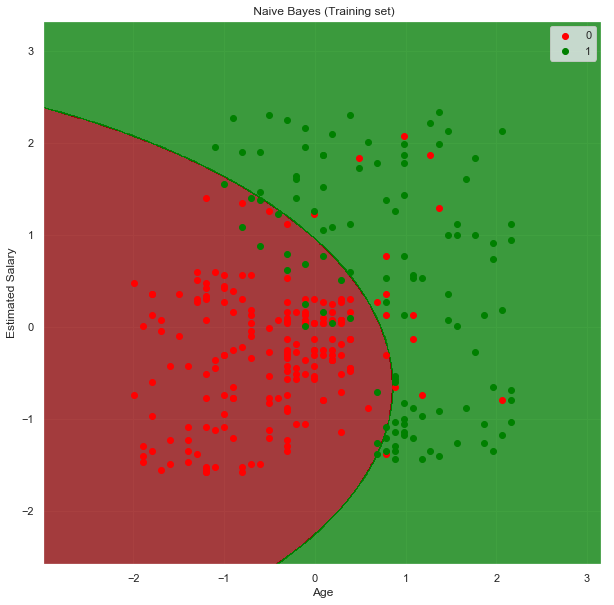

In [18]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkred', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title(' Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [21]:
## Observation
## we chose the rbf kernel for SVM (hence straight line)
## same as logistic regression 
## we are predicting in such a way to prevent overfitting

## so what are we trying to make them do?
## goal: classify the right users into the right category/region/class
## the prediction regions (red and green)
## red region: classifier prediction user who did not buy
## green region: classifier prediction user who did not buy
## separator: the prediction boundary is a curve
## the kernel svm is not over classifier = avoids over fitting

## let's investigate the performance of the model on the test set


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


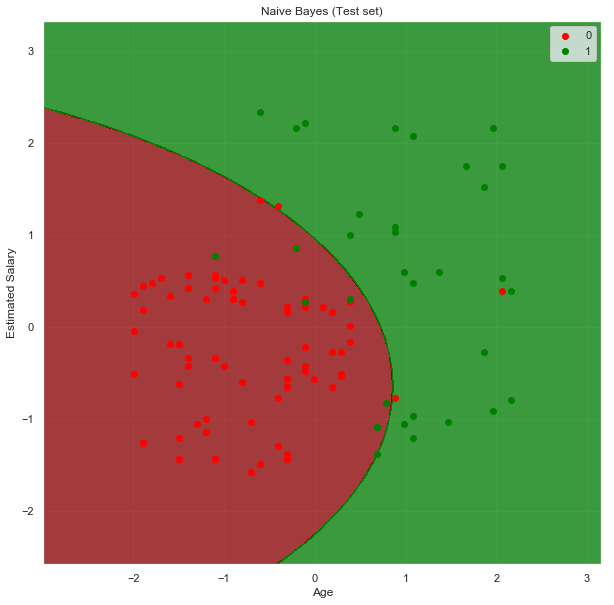

In [19]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkred', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [19]:
## Observation
## prediction is much better than SVM
## the prediction regions predict well, there are a few misclassified (10)